In [221]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
import matplotlib.pyplot as plt
import seaborn as sns


In [222]:
x, y = load_breast_cancer(return_X_y=True,as_frame=False)
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [223]:
x_df, y_df = load_breast_cancer(return_X_y=True,as_frame=True)
x_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [224]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [225]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, train_size=0.70, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

In [226]:
class TreeNode:
    def __init__(self, left=None, right=None, feature=None, feature_value=None, threshold=None, gain=None, samples=None):
        self.left = left
        self.right = right
        self.feature = feature
        self.feature_value = feature_value
        self.threshold = threshold
        self.gain = gain
        self.samples = samples

    def is_leaf(self): 
        return self.feature_value is not None 
    # node becomes leaf when it has a value

In [ ]:
class DecisionTree:
    def __init__(self, max_depth, min_samples_split):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None

    def build_tree(self, x, y, depth):
        samples, _ = x.shape # x dimensions is the samples with their features
        classes = len(np.unique(y))

        if(depth >= self.max_depth or samples < self.min_samples_split or classes == 1): # stopping conditions
            selected_class = np.bincount(y).argmax()
            return TreeNode(None, None, None, selected_class, None, None, samples) # return leaf node with most common class
        
        best_feature, best_threshold, best_gain = self.select_best_split(x, y) 
        left_index, right_index = self.split_node(x, best_feature, best_threshold) # splitting the node at the best feature
        left_subtree = self.build_tree(x[left_index, :], y[left_index], depth + 1)
        right_subtree = self.build_tree(x[right_index, :], y[right_index], depth + 1)
        # print("Depth:", depth, "Samples:", samples)
        return TreeNode(left_subtree, right_subtree, best_feature, None, best_threshold, best_gain, samples) # return new node
        
    def calculate_Entropy(self, y):
        counts = np.bincount(y) # counts of each class in y
        probabilities = counts / counts.sum()
        entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
        return entropy
        
    def split_node(self, x, feature, threshold):
        left_index = x[:, feature] <= threshold # splitting samples at that feature and threshold
        right_index = x[:, feature] > threshold

        return left_index, right_index  

    def calculate_Information_Gain(self, x, y, feature, threshold):
        original_entropy = self.calculate_Entropy(y) #H(y)
        left_index, right_index = self.split_node(x, feature, threshold)
        n, n_left, n_right = len(y), len(y[left_index]), len(y[right_index])
        if n_left == 0 or n_right == 0: # no split
            return 0
        new_entropy = (n_left / n) * self.calculate_Entropy(y[left_index]) + (n_right / n) * self.calculate_Entropy(y[right_index]) # entropies * their weights
        information_gain = original_entropy - new_entropy
        return information_gain

    def select_best_split(self, x, y):
        best_information_gain = -1
        best_feature, best_threshold = None, None
        features = x.shape[1]

        for feature in range(features):
            values = np.sort(np.unique(x[:, feature]))
            thresholds = (values[:-1] + values[1:]) / 2 # midpoints between values
            for threshold in thresholds:
                information_gain = self.calculate_Information_Gain(x, y, feature, threshold)
                if information_gain > best_information_gain:
                    best_information_gain = information_gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold, best_information_gain
    
    def fit(self, x, y):
        self.features = x.shape[1]
        self.root = self.build_tree(x, y, 0) # building the tree starting from depth 0
    
    def traverse_tree(self, x, node): # for prediction
        if node.is_leaf():
            return node.feature_value
        if x[node.feature] <= node.threshold:
            return self.traverse_tree(x, node.left)
        else:
            return self.traverse_tree(x, node.right)
        
    def predict(self, x):
        predictions = []
        for sample in x:
            prediction = self.traverse_tree(sample, self.root)
            predictions.append(prediction)
        return predictions
    
    def calculate_feature_importance(self):
        feature_importance = np.zeros(self.features)
        self.traverse_importance(self.root, feature_importance)
        feature_importance /= feature_importance.sum() # importance normalization
        return feature_importance

    def traverse_importance(self, node, feature_importance):
        if node.is_leaf():
            return
        feature_importance[node.feature] += node.gain * node.samples # calculating importance at each node
        self.traverse_importance(node.left, feature_importance)
        self.traverse_importance(node.right, feature_importance)


        


In [228]:
max_depth_arr = [2, 4, 6, 8, 10] 
min_samples_split_arr = [2, 5, 10]
def tuningHyperparameters():

    for max_depth in max_depth_arr:
        for min_samples_split in min_samples_split_arr:
            dTree = DecisionTree(max_depth, min_samples_split)
            dTree.fit(x_train, y_train)
            ypred = dTree.predict(x_val)
            val_accuracy = accuracy_score(y_val, ypred)
            train_accuracy = accuracy_score(y_train, dTree.predict(x_train))
            print(f" Max Depth: {max_depth}\n Min Samples Split: {min_samples_split}\n Training Accuracy: {train_accuracy*100:.2f}%\n Validation Accuracy: {val_accuracy*100:.2f}%\n")

tuningHyperparameters()

 Max Depth: 2
 Min Samples Split: 2
 Training Accuracy: 92.71%
 Validation Accuracy: 92.94%

 Max Depth: 2
 Min Samples Split: 5
 Training Accuracy: 92.71%
 Validation Accuracy: 92.94%



KeyboardInterrupt: 

In [229]:
dTree = DecisionTree(10, 2)
dTree.fit(x_train, y_train)
ypred = dTree.predict(x_test)
train_accuracy = accuracy_score(y_train, dTree.predict(x_train))
test_accuracy = accuracy_score(y_test, ypred)
print(f"Train Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(classification_report(y_test, ypred))

Train Accuracy: 100.00%
Test Accuracy: 95.35%
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.97      0.97      0.97        60

    accuracy                           0.95        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.95      0.95      0.95        86



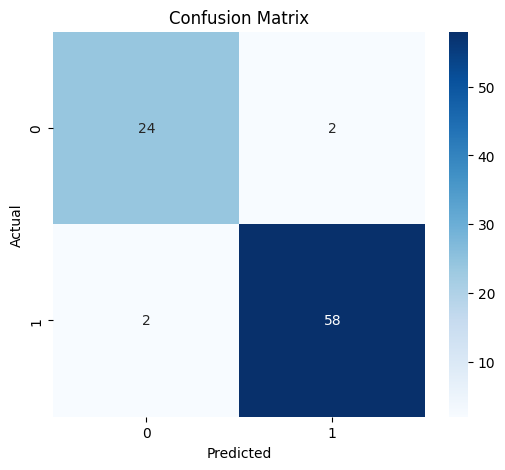

In [ ]:
cm = confusion_matrix(y_test, ypred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

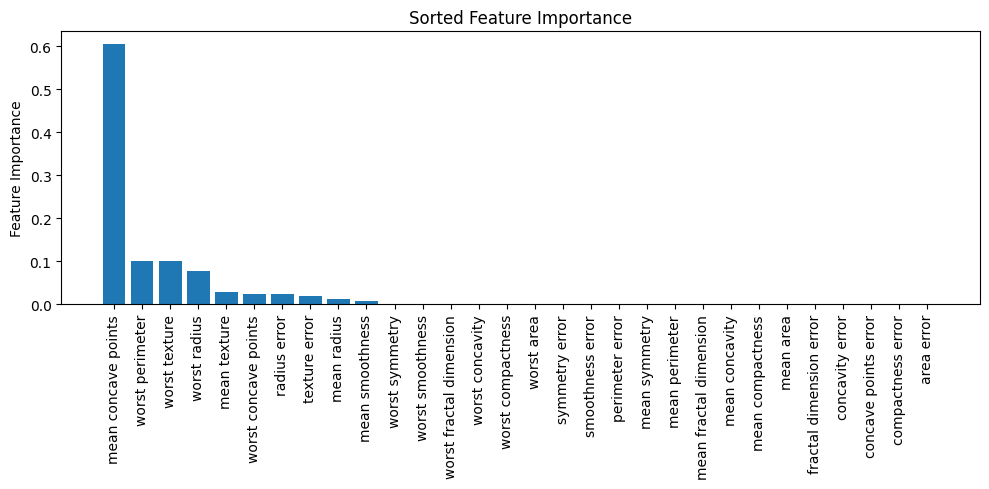

In [230]:
importance = dTree.calculate_feature_importance()
feature_names = x_df.columns
sorted_pairs = sorted(zip(importance, feature_names), reverse=True)
sorted_importance, sorted_names = zip(*sorted_pairs)
plt.figure(figsize=(10,5))
plt.bar(range(len(sorted_importance)), sorted_importance)
plt.xticks(range(len(sorted_importance)), sorted_names, rotation=90)
plt.ylabel("Feature Importance")
plt.title("Sorted Feature Importance")
plt.tight_layout()
plt.show()
